In [14]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
import talib as ta
#グラフ化のときの警告をなくす
import warnings
warnings.simplefilter('ignore')

In [20]:
start ='2019-07-01'
end ='2021-01-10'

df=data.DataReader('^N225','yahoo',start,end)

#為替'DEXJPUS'
#ビットコイン’BTC=JPY’

In [21]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,21758.339844,21559.169922,21566.269531,21729.970703,66900000,21729.970703
2019-07-02,21784.220703,21697.310547,21699.429688,21754.269531,54700000,21754.269531
2019-07-03,21708.720703,21566.650391,21684.070312,21638.160156,55000000,21638.160156
2019-07-04,21755.630859,21672.500000,21740.929688,21702.449219,37800000,21702.449219
2019-07-05,21746.380859,21647.730469,21703.609375,21746.380859,44800000,21746.380859
2019-07-08,21672.650391,21499.570312,21665.789062,21534.349609,51900000,21534.349609
2019-07-09,21687.289062,21508.220703,21598.150391,21565.150391,53900000,21565.150391
2019-07-10,21601.859375,21488.220703,21499.460938,21533.480469,58900000,21533.480469
2019-07-11,21649.929688,21532.570312,21547.189453,21643.529297,49600000,21643.529297


In [22]:
date=df.index #日付
close=df['Adj Close']#終値

# ■移動平均線

In [23]:
span01=5
span02=25
span03=50

df['sma01']=close.rolling(window=span01).mean() #5日移動平均
df['sma02']=close.rolling(window=span02).mean() #25日移動平均
df['sma03']=close.rolling(window=span03).mean() #50日移動平均

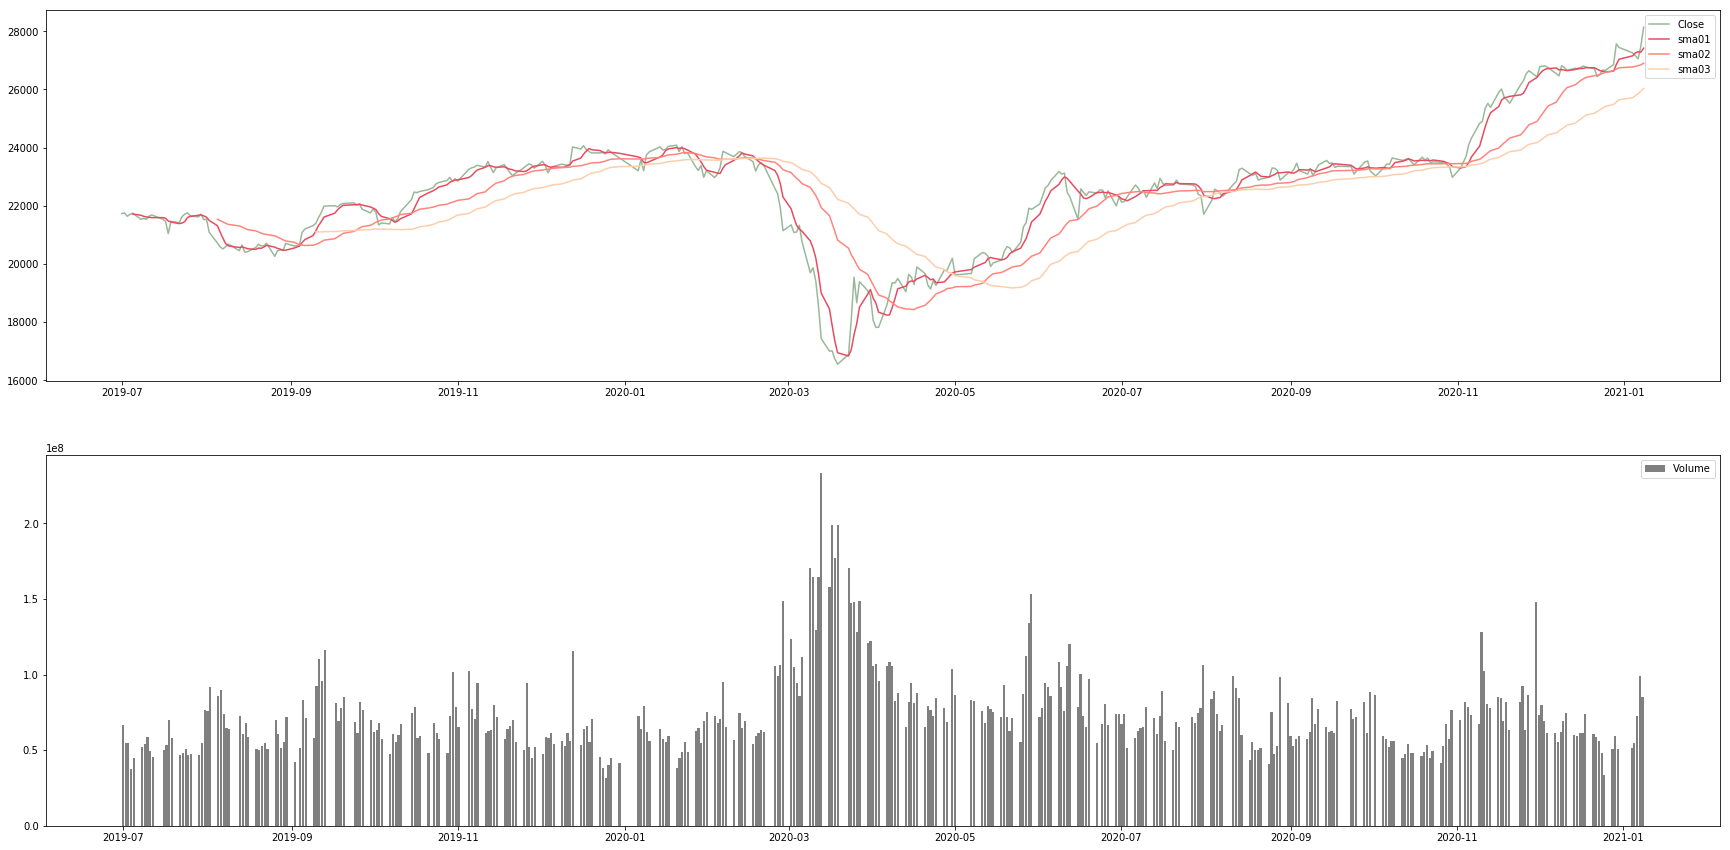

In [24]:
#株価、5日、２５日、５０日の移動平均線、出来高をグラフ化
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

# ■MACD
トレンドをみる指標  
０以上なら上昇トレンド  
０以下なら下降トレンド

In [25]:
df['macd'],df['macdsignal'],df['macdhist']=ta.MACD(close,fastperiod=12,slowperiod=26,signalperiod=9) #talibを使ってMACDを計算(fastperiod短期移動平均,slowperiod長期移動平均,signalperiodMACDシグナル)

In [26]:
df.head()
#最初データは平均を使うのでない

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2019-07-01,21758.339844,21559.169922,21566.269531,21729.970703,66900000,21729.970703,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,21784.220703,21697.310547,21699.429688,21754.269531,54700000,21754.269531,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,21708.720703,21566.650391,21684.070312,21638.160156,55000000,21638.160156,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-04,21755.630859,21672.500000,21740.929688,21702.449219,37800000,21702.449219,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-05,21746.380859,21647.730469,21703.609375,21746.380859,44800000,21746.380859,21714.246094,NaN,NaN,NaN,NaN,NaN


In [27]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2021-01-04,27602.109375,27042.320312,27575.570312,27258.380859,51500000,27258.380859,27156.267969,26773.668281,25718.278125,370.107636,371.805782,-1.698146
2021-01-05,27279.779297,27073.460938,27151.380859,27158.630859,55000000,27158.630859,27256.672266,26794.225078,25788.661523,358.925443,369.229715,-10.304271
2021-01-06,27196.400391,27002.179688,27102.849609,27055.939453,72700000,27055.939453,27297.054297,26819.117891,25860.294922,337.882241,362.960220,-25.077979
2021-01-07,27624.730469,27340.460938,27340.460938,27490.130859,98900000,27490.130859,27281.450391,26847.221562,25939.765742,352.181243,360.804424,-8.623182
2021-01-08,28139.029297,27667.750000,27720.140625,28139.029297,84900000,28139.029297,27420.422266,26900.743516,26032.659531,411.134681,370.870476,40.264205


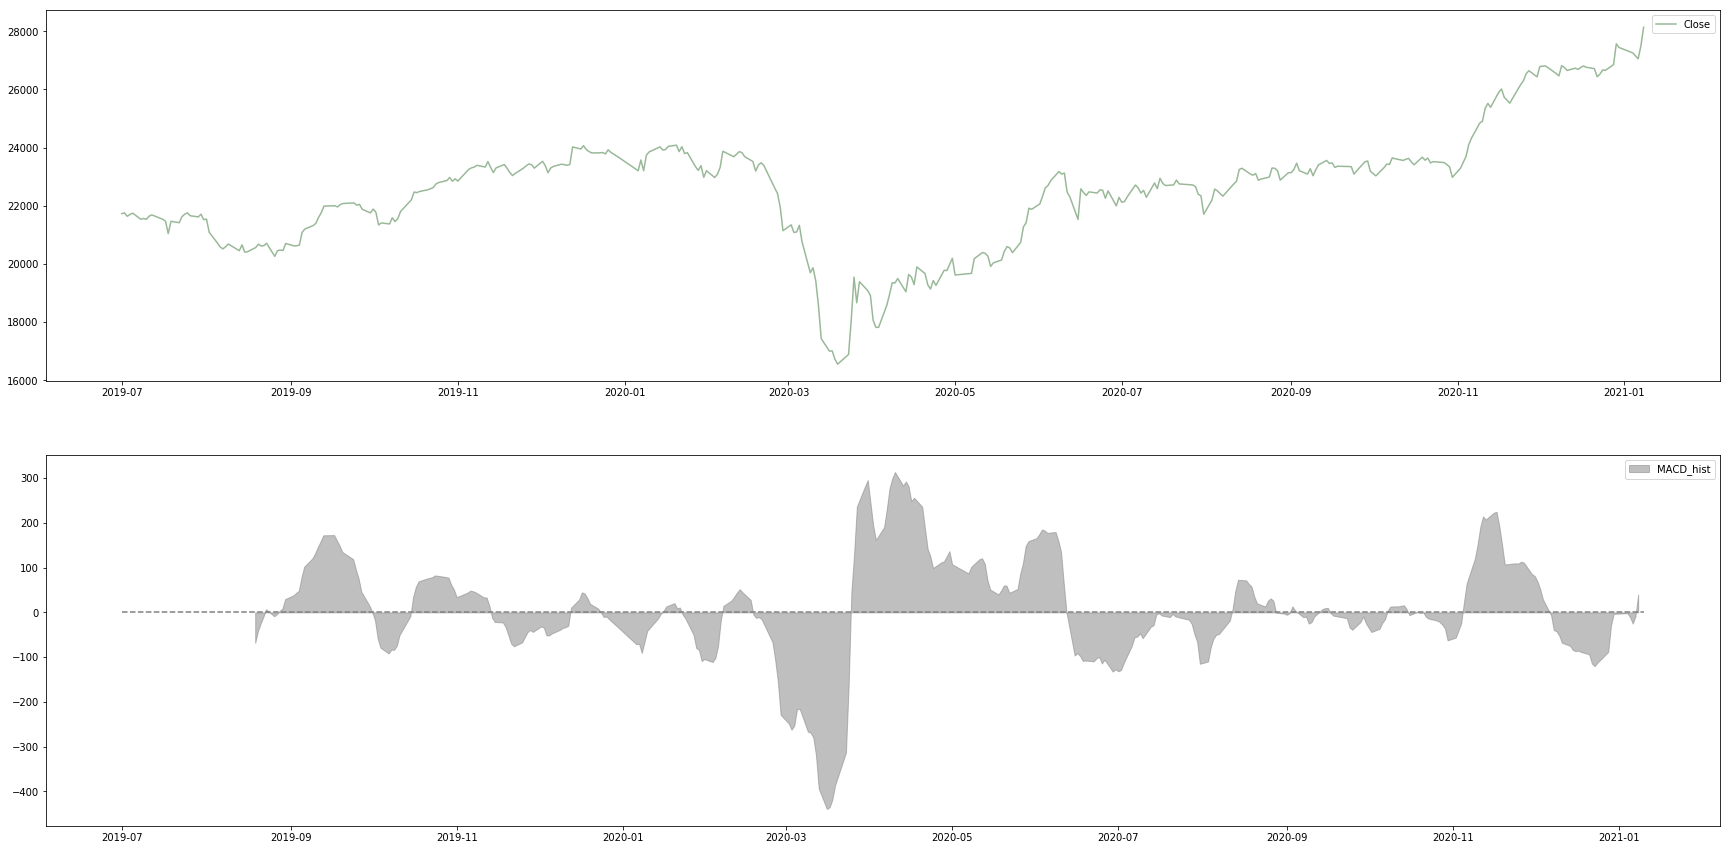

In [28]:
#MACDの折れ線グラフを表示
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
# plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
# plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
# plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.fill_between(date,df['macdhist'],color='grey',alpha=0.5,label='MACD_hist')
plt.hlines(0,start,end,"gray",linestyles="dashed")
plt.legend()

# ■RSI
売られすぎ、買われすぎを表す指標  

20~30%を下回る....売られすぎ➡逆張りの買いと判断  
70~80%を上回る....買われすぎ➡逆張りの売りと判断  


In [30]:
df['RSI']=ta.RSI(close,timeperiod=span02)

In [31]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2021-01-04,27602.109375,27042.320312,27575.570312,27258.380859,51500000,27258.380859,27156.267969,26773.668281,25718.278125,370.107636,371.805782,-1.698146,65.998893
2021-01-05,27279.779297,27073.460938,27151.380859,27158.630859,55000000,27158.630859,27256.672266,26794.225078,25788.661523,358.925443,369.229715,-10.304271,64.457323
2021-01-06,27196.400391,27002.179688,27102.849609,27055.939453,72700000,27055.939453,27297.054297,26819.117891,25860.294922,337.882241,362.960220,-25.077979,62.882237
2021-01-07,27624.730469,27340.460938,27340.460938,27490.130859,98900000,27490.130859,27281.450391,26847.221562,25939.765742,352.181243,360.804424,-8.623182,66.488834
2021-01-08,28139.029297,27667.750000,27720.140625,28139.029297,84900000,28139.029297,27420.422266,26900.743516,26032.659531,411.134681,370.870476,40.264205,70.891889


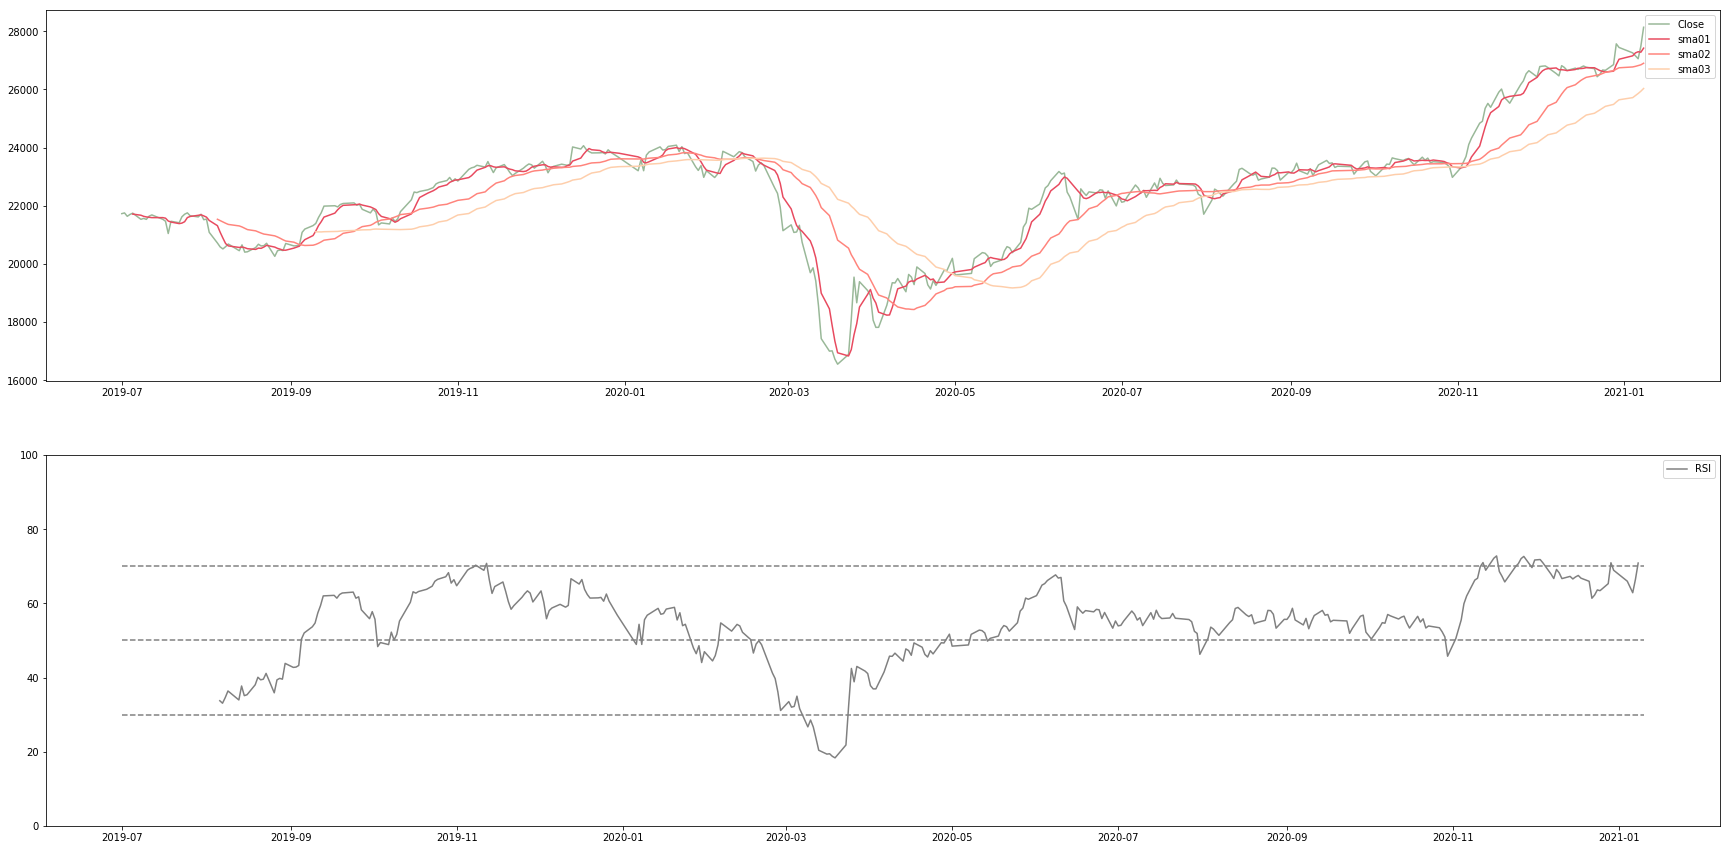

In [32]:
#RSIグラフを表示
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.plot(date,df['RSI'],label='RSI',color="grey")
plt.ylim(0,100)
plt.hlines([30,50,70],start,end,"gray",linestyles="dashed")
plt.legend()

# ■ボリンジャーバンド
RSI同様に売られすぎ、買われすぎを示す  
  
移動平均などの一定期間の平均に対して、一定期間の標準偏差を足したものと引いたもの。  
一般的にはプラスマイナス標準偏差の２倍を使う。  
終値は２本のラインの間に収まる。収まらない場合、売られすぎ、買われすぎ。

In [34]:
df["upper"],df["middle"],df["lower"]=ta.BBANDS(close,timeperiod=span02,nbdevup=2,nbdevdn=2,matype=0)
#mattype0...単純移動平均、1...指数移動平均,2....加重移動平均

In [35]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,,
2021-01-04,27602.109375,27042.320312,27575.570312,27258.380859,51500000,27258.380859,27156.267969,26773.668281,25718.278125,370.107636,371.805782,-1.698146,65.998893,27315.340103,26773.668281,26231.996459
2021-01-05,27279.779297,27073.460938,27151.380859,27158.630859,55000000,27158.630859,27256.672266,26794.225078,25788.661523,358.925443,369.229715,-10.304271,64.457323,27353.482287,26794.225078,26234.967869
2021-01-06,27196.400391,27002.179688,27102.849609,27055.939453,72700000,27055.939453,27297.054297,26819.117891,25860.294922,337.882241,362.960220,-25.077979,62.882237,27367.244939,26819.117891,26270.990843
2021-01-07,27624.730469,27340.460938,27340.460938,27490.130859,98900000,27490.130859,27281.450391,26847.221562,25939.765742,352.181243,360.804424,-8.623182,66.488834,27454.811708,26847.221562,26239.631417
2021-01-08,28139.029297,27667.750000,27720.140625,28139.029297,84900000,28139.029297,27420.422266,26900.743516,26032.659531,411.134681,370.870476,40.264205,70.891889,27690.913133,26900.743516,26110.573898


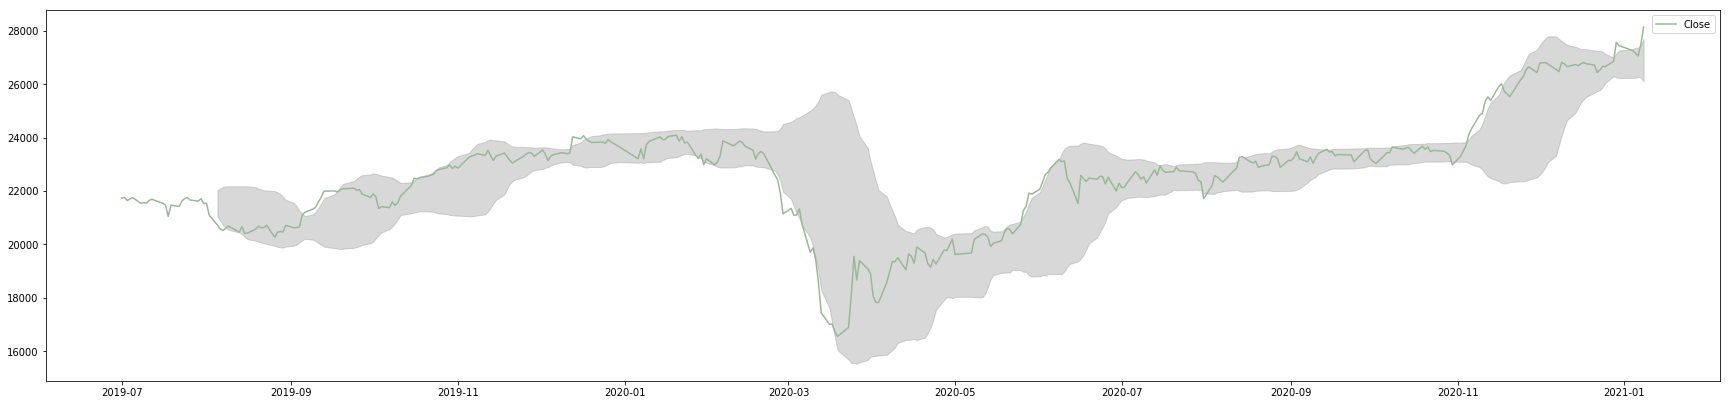

In [36]:
#RSIグラフを表示
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.fill_between(date,df["upper"],df["lower"],color="grey",alpha=0.3)
plt.legend()



# ■すべての指標を表示

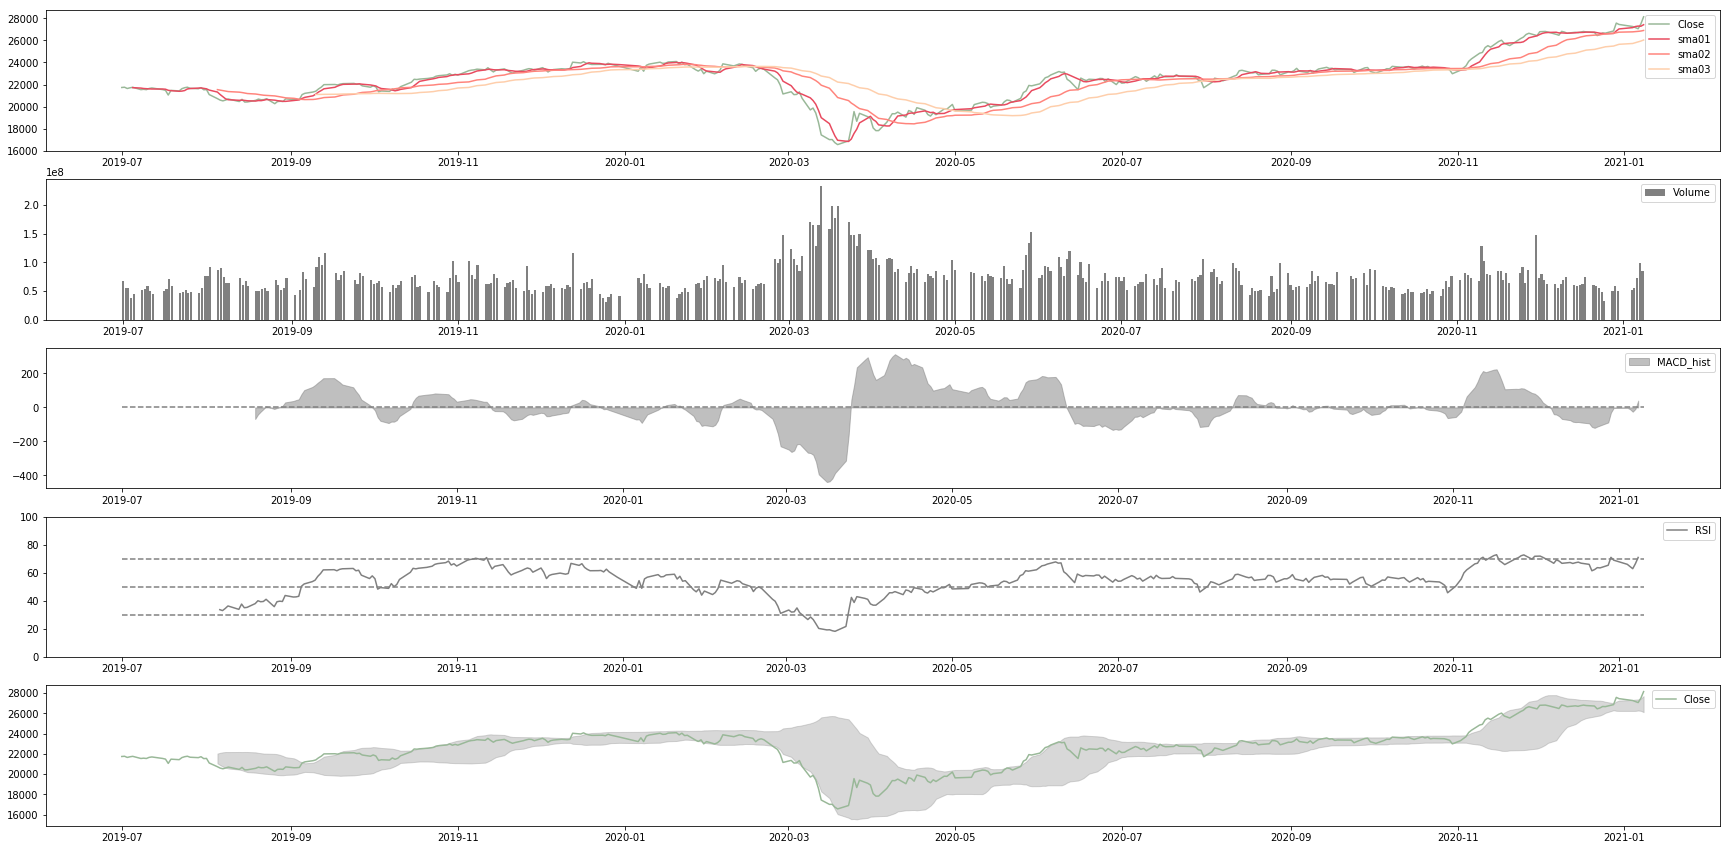

In [38]:
plt.figure(figsize=(30,15))
plt.subplot(5,1,1)

plt.plot(date,close,label='Close',color='#99b898')
plt.plot(date,df['sma01'],label='sma01',color='#e84a5f')
plt.plot(date,df['sma02'],label='sma02',color='#ff847c')
plt.plot(date,df['sma03'],label='sma03',color='#feceab')
plt.legend()

plt.subplot(5,1,2)
plt.bar(date,df['Volume'],label='Volume',color='grey')
plt.legend()

plt.subplot(5,1,3)
plt.fill_between(date,df['macdhist'],color='grey',alpha=0.5,label='MACD_hist')
plt.hlines(0,start,end,"gray",linestyles="dashed")
plt.legend()

plt.subplot(5,1,4)
plt.plot(date,df['RSI'],label='RSI',color="grey")
plt.ylim(0,100)
plt.hlines([30,50,70],start,end,"gray",linestyles="dashed")
plt.legend()

plt.subplot(5,1,5)
plt.plot(date,close,label='Close',color='#99b898')
plt.fill_between(date,df["upper"],df["lower"],color="grey",alpha=0.3)
plt.legend()



